# SMOTE + ENN and SMOTE + Tomek Links

Combined used of SMOTE and ENN or Tomek Links to amplify the minority class and remove noisy observations that might be created.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs, make_classification

from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

## Create data

In [2]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# how separate the classes are
                           random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['VarA', 'VarB'])
    y = pd.Series(y)
    
    return X, y

X, y = make_data(sep=2)

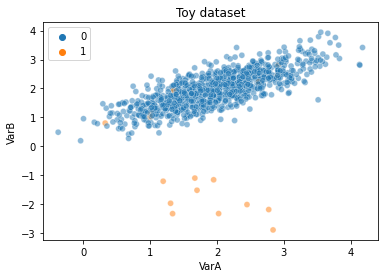

In [3]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## SMOTEENN and SMOTETomek

- [SMOTEENN](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html)
- [SMOTETomek](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html)

In [4]:
sm = SMOTE(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5,
    n_jobs=4
)

X_sm, y_sm = sm.fit_resample(X, y)

In [5]:
# need ENN  as argument of SMOTEENN
enn = EditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=3,
    kind_sel='all',
    n_jobs=4)


smenn = SMOTEENN(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    smote=sm,
    enn=enn,
    n_jobs=4
)

X_smenn, y_smenn = smenn.fit_resample(X, y)

In [6]:
# need tomek as argument of SMOTETomek
tl = TomekLinks(
    sampling_strategy='all',
    n_jobs=4)

smtomek = SMOTETomek(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    smote=sm,
    tomek=tl,
    n_jobs=4
)

X_smtl, y_smtl = smtomek.fit_resample(X, y)

In [7]:
# size of oversampled datasets

X_sm.shape, X_smenn.shape, X_smtl.shape

((1966, 2), (1735, 2), (1834, 2))

In [8]:
# number of minority class observations

y.value_counts(), y_sm.value_counts(), y_smenn.value_counts(), y_smtl.value_counts()

(0    983
 1     17
 dtype: int64,
 1    983
 0    983
 dtype: int64,
 0    983
 1    752
 dtype: int64,
 1    917
 0    917
 dtype: int64)

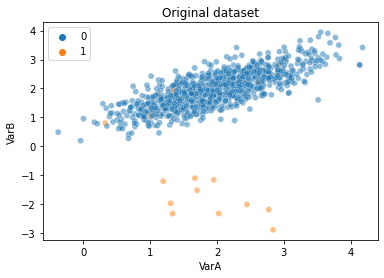

In [9]:
# plot of original data

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

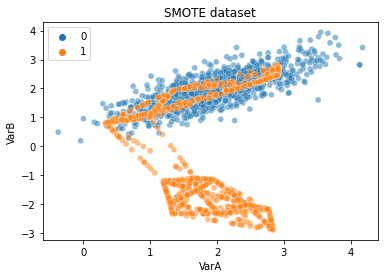

In [10]:
# plot of original data

sns.scatterplot(
    data=X_sm, x="VarA", y="VarB", hue=y_sm, alpha=0.5
)

plt.title('SMOTE dataset')
plt.show()

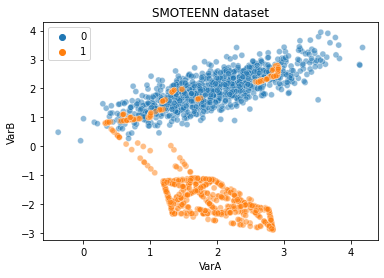

In [11]:
sns.scatterplot(
    data=X_smenn, x="VarA", y="VarB", hue=y_smenn, alpha=0.5
)

plt.title('SMOTEENN dataset')
plt.show()

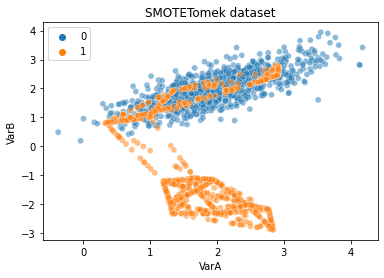

In [12]:
sns.scatterplot(
    data=X_smtl, x="VarA", y="VarB", hue=y_smtl, alpha=0.5
)

plt.title('SMOTETomek dataset')
plt.show()

We can see that when the classes are not well separated, a combination of Over and undersampling can help remove the noisy samples created by SMOTE.

**HOMEWORK**

- Test SMOTE + ENN or Tomek Links in one of the datasets from imbalanced-learn and make some plots of variables highlighting the minority class to play and visualize the outcome better. 

- Change the separateness of the classes in the function to create data in this notebook and explore how the methods create different distributions of the minority class.